<a href="https://colab.research.google.com/github/safira123-pixel/PCVK_Genap_2023/blob/main/UAS_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 06

 1. Safira Istifarini ( 2041720229 | 17 )<br>
 2. Hafizh Izhar Darmansyah ( 2041720078 | 11 )

PENDETEKSI TEPI CITRA KANKER KULIT MENGGUNAKAN METODE LAPLACIAN OF GAUSSIAN

Metode Laplacian of Gaussian (LoG) adalah teknik pengolahan citra yang menggabungkan operasi filter Laplacian dengan filter Gaussian untuk mendeteksi tepi dan fitur pada citra. Metode ini biasanya digunakan untuk memperoleh gambar yang lebih tajam dan untuk menemukan tepi dengan ukuran yang berbeda-beda.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from google.colab.patches import cv2_imshow
%matplotlib inline

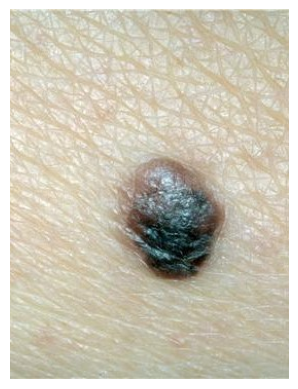

In [ ]:
# Membaca citra
y1 = cv2.imread('/content/drive/MyDrive/PCVK/melanoma/dermIS/SSM22_orig.jpg')
y1 = cv2.cvtColor(x1, cv2.COLOR_BGR2RGB)
plt.imshow(y1)
plt.axis('off')
plt.show()

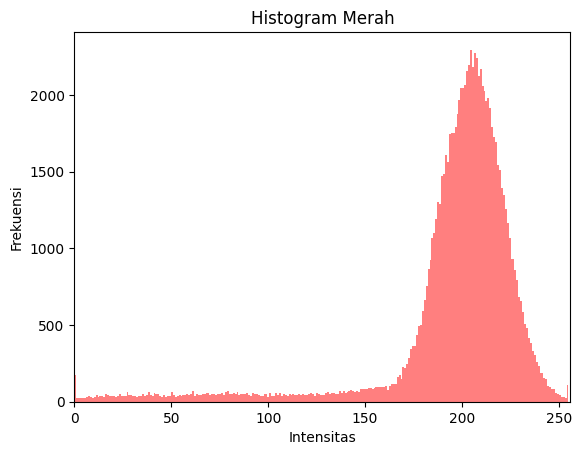

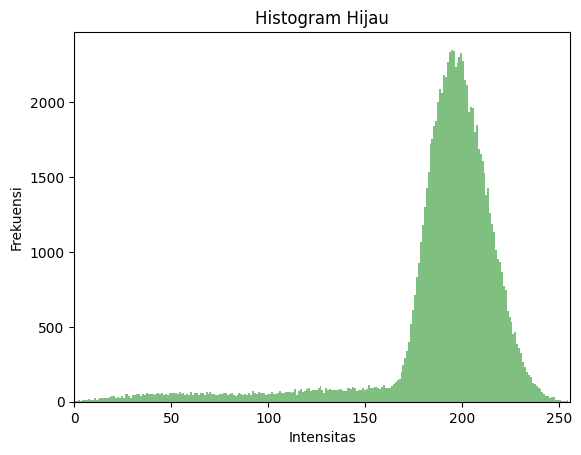

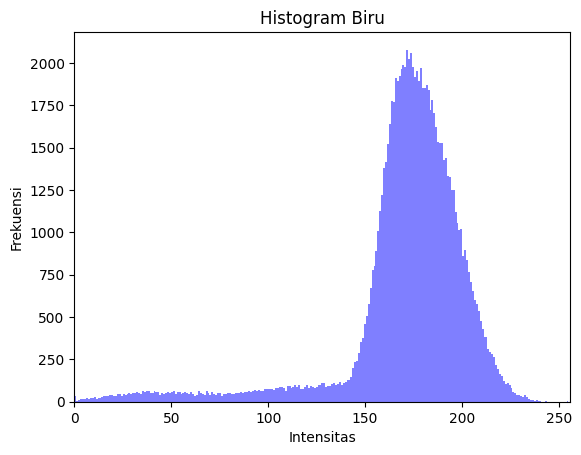

In [ ]:
x1 = cv2.imread('/content/drive/MyDrive/PCVK/melanoma/dermIS/SSM22_orig.jpg')
x1 = cv2.cvtColor(x1, cv2.COLOR_BGR2RGB)

#histogram berguna untuk mengetahui distribusi piksel di dalam citra

#slicing array untuk tiga saluran warna yang terpisah, yaitu merah, hijau, biru
red = x1[:,:,0]
green = x1[:,:,1]
blue = x1[:,:,2]

# Histogram untuk kanal merah
plt.figure()
plt.hist(red.ravel(), bins=256, color='red', alpha=0.5)
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')
plt.title('Histogram Merah')
plt.xlim([0, 256])

# Histogram untuk kanal hijau
plt.figure()
plt.hist(green.ravel(), bins=256, color='green', alpha=0.5)
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')
plt.title('Histogram Hijau')
plt.xlim([0, 256])

# Histogram untuk kanal biru
plt.figure()
plt.hist(blue.ravel(), bins=256, color='blue', alpha=0.5)
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')
plt.title('Histogram Biru')
plt.xlim([0, 256])

plt.show()

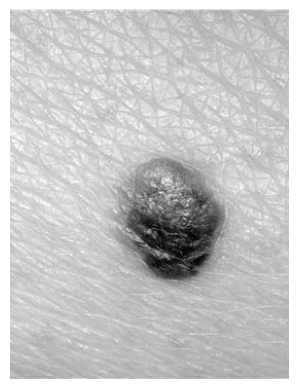

In [ ]:
# Membaca citra
x1 = cv2.imread('/content/drive/MyDrive/PCVK/melanoma/dermIS/SSM22_orig.jpg')

# Mengubah citra menjadi grayscale
I1 = cv2.cvtColor(x1, cv2.COLOR_BGR2GRAY)

# Menampilkan citra grayscale
plt.imshow(I1, cmap='gray')
plt.axis('off')
plt.show()

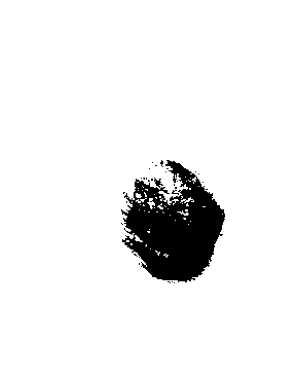

In [ ]:
# Membaca citra
x1 = cv2.imread('/content/drive/MyDrive/PCVK/melanoma/dermIS/SSM22_orig.jpg')

# Mengubah citra menjadi grayscale
I1 = cv2.cvtColor(x1, cv2.COLOR_BGR2GRAY)

# piksel dengan intensitas di atas ambang batas akan menjadi putih (255)
# piksel dengan intensitas di bawah ambang batas akan menjadi hitam (0).
# Menggunakan metode Otsu untuk menentukan ambang batas
_, b1 = cv2.threshold(I1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menampilkan citra biner
plt.figure()
plt.imshow(b1, cmap='gray')
plt.axis('off')
plt.show()

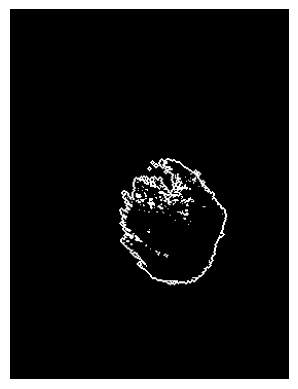

In [ ]:
# Membaca citra
x1 = cv2.imread('/content/drive/MyDrive/PCVK/melanoma/dermIS/SSM22_orig.jpg')
I1 = cv2.cvtColor(x1, cv2.COLOR_BGR2GRAY)

# Menggunakan metode Otsu untuk menentukan ambang batas
_, t = cv2.threshold(I1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Matriks kernel LoG digunakan untuk menghitung konvolusi dengan citra
M = np.array([[0, 0, -1, 0, 0],
              [0, -1, -2, -1, 0],
              [-1, -2, 16, -2, -1],
              [0, -1, -2, -1, 0],
              [0, 0, -1, 0, 0]], dtype=np.float32)

# Melakukan konvolusi LoG pada citra biner 'b1'
#-1 untuk menjaga kedalaman citra hasil dengan citra imput
LoG = cv2.filter2D(b1, -1, M)

# Menampilkan citra hasil
plt.imshow(LoG, cmap='gray')
plt.axis('off')
plt.show()


Jumlah Kontur: 1


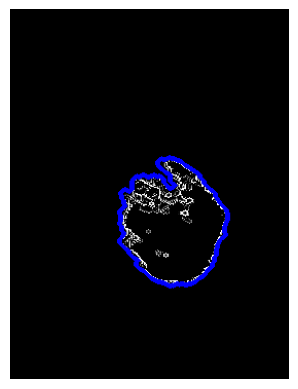

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

x1 = cv2.imread('/content/drive/MyDrive/PCVK/melanoma/dermIS/SSM22_orig.jpg')
I1 = cv2.cvtColor(x1, cv2.COLOR_BGR2GRAY)

_, b1 = cv2.threshold(I1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan penghalusan Gaussian
b1 = cv2.GaussianBlur(b1, (3, 3), 0)

# Lakukan operasi morfologi untuk meningkatkan deteksi kontur
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
#Tujuan dari operasi closing adalah untuk menutup celah-celah kecil dalam kontur dan menghilangkan kecilnya lubang dalam objek.
b1 = cv2.morphologyEx(b1, cv2.MORPH_CLOSE, kernel)
#Operasi opening bertujuan untuk menghilangkan noise atau detail kecil di luar kontur utama. Dengan melakukan erosi terlebih dahulu
b1 = cv2.morphologyEx(b1, cv2.MORPH_OPEN, kernel)

M = np.array([[0, 0, -1, 0, 0],
              [0, -1, -2, -1, 0],
              [-1, -2, 16, -2, -1],
              [0, -1, -2, -1, 0],
              [0, 0, -1, 0, 0]], dtype=np.float32)

LoG = cv2.filter2D(b1, -1, M)

image_contours = np.repeat(LoG[:, :, np.newaxis], 3, axis=2)

contours, _ = cv2.findContours(LoG.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

count = len(contours)
print("Jumlah: " + str(count))

cv2.drawContours(image_contours, contours, -1, (0, 0, 255), 3)

plt.imshow(image_contours)
plt.axis('off')
plt.show()